# Make sure all your code is in functions. Read chapter 20 before completing the following.

* (5 pts) Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-dataLinks to an external site.  or https://www.kaggle.com/datasets/imakash3011/customer-personality-analysisLinks to an external site. . How are you handling nulls? What process(es) are you using to encode and normalize the data?
* (10 pts) Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?
* (7 pts) Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?
* (3 pts) Compare the results of 2 and 3. Which approach do you think is best? Why?

In [10]:
data = pd.read_csv('data_utf.csv') 

data.head()

# Opened the csv in a notepad and saved it as UTF-8 Encoding to fix it and be able to run it through as a dataframe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Preprocessing 

In [13]:

# Step 1: Handle Nulls
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [60]:

data = data.dropna(subset=['CustomerID'])


data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


data = data.drop_duplicates()


data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]


data = data.reset_index(drop=True)

print("Updated dataset after preprocessing:")
data.head()


Updated dataset after preprocessing:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


* I started my cleaning up process by checking to see if there were any missing variables. Then, I dropped the rows that had the missing variables.
* I converted the time for the Invoice date to to datetime format.
* I dropped any possible duplicate rows.
* I removed rows with - quantities or prices as its impossible to have something cost (-) dollars or have (-) amount of items.
* Then I reset the index. 

# K-Means++ Clustering 

In [27]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.6 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 7.9 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 8.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.4 MB/s eta 0:00:00ta 0:00:01
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


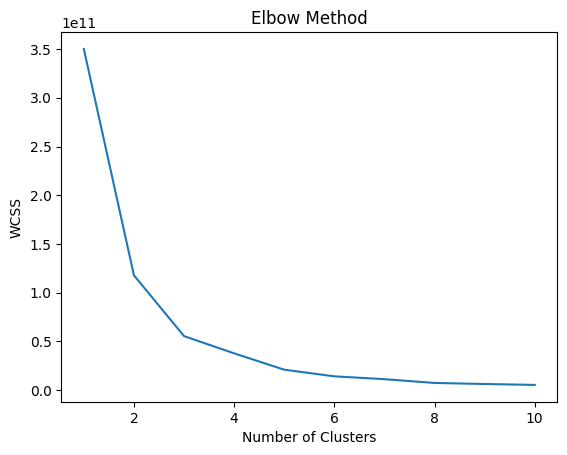

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
customer_data = data.groupby('CustomerID')['TotalPrice'].sum().reset_index()


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(customer_data[['TotalPrice']])
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


* Using the elbow method to see the number of clusters I'll need, and also to ensure that there are clusters to begin with. Since the elbow falls between 2-4, it's better to go with the smaller number just in case I end up accidentally overfitting. 
* I'm going to proceed with the K-means clustering with 2 clusters. 

In [35]:

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)

customer_data['Cluster'] = kmeans.fit_predict(customer_data[['TotalPrice']])

customer_data


,CustomerID,TotalPrice,Cluster
0,12346.0,77183.60,0
1,12347.0,4310.00,0
2,12348.0,1797.24,0
3,12349.0,1757.55,0
4,12350.0,334.40,0
...,...,...,...
4333,18280.0,180.60,0
4334,18281.0,80.82,0
4335,18282.0,178.05,0
4336,18283.0,2045.53,0


In [36]:

print(customer_data['Cluster'].value_counts())


Cluster
0    4331
1       7
Name: count, dtype: int64


* I was confused after performing the k-means++ clustering as to why my data seemed to only get assigned to one cluster so I then performed the k-means++ with a variety of separate cluster amounts and I found that anywhere from 2-5 clusters there will still be over 4000 variables assigned to one cluster (except for 5 clusters, that one had 3854 values assigned to it, but I still find that to be an extreme amount).
* While it may look odd, I will stick with 2 clusters as its what the elbow graph indicated and implementing further clusters only aids in supporting the fact that most of the data fits into one cluster.
* I'll keep the code I used to determine further clusters below but in markdown format. 

from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['TotalPrice']])

k_values = [2, 3, 4, 5]
init_methods = ['k-means++', 'random']

for k in k_values:
    for init_method in init_methods:
        kmeans = KMeans(n_clusters=k, init=init_method, random_state=42)
        customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)
        print(f"Number of clusters: {k}, Initialization method: {init_method}")
        customer_data['Cluster'].value_counts()
        print("--------------------------------------------------")


# Hierarchal Clustering 

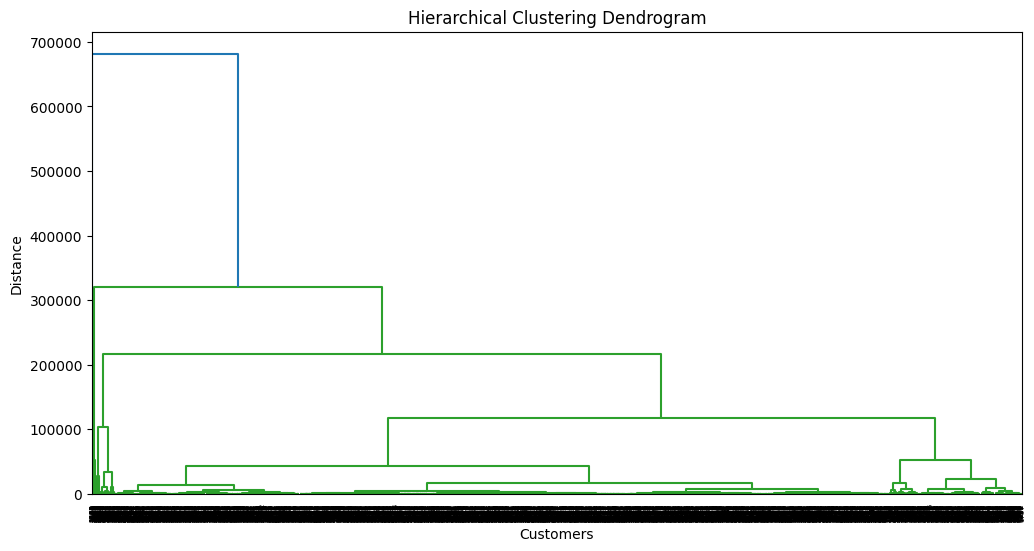

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage


Z = linkage(customer_data[['TotalPrice']], method='ward')


plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()



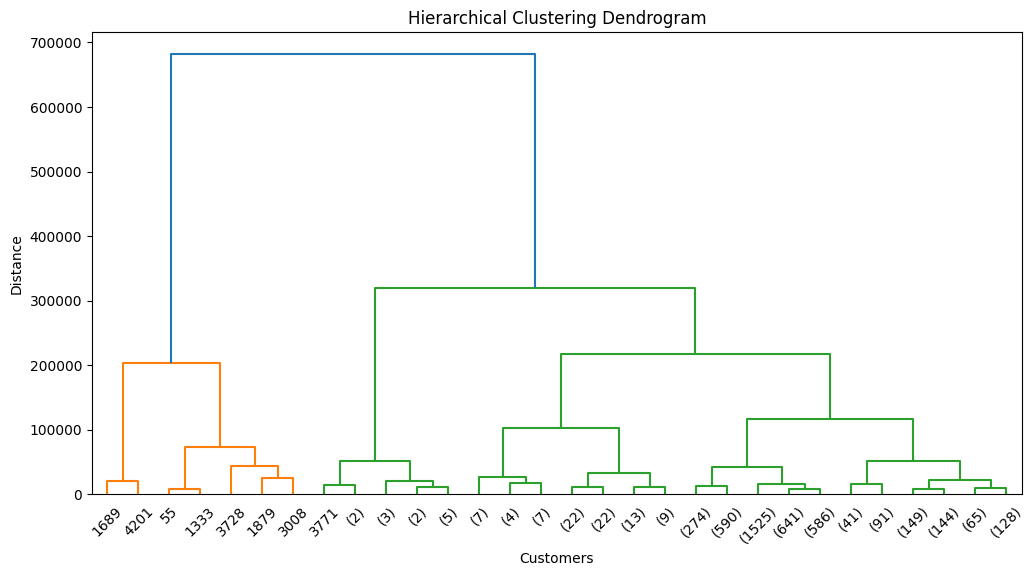

In [43]:

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30)  
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()


In [59]:
from scipy.cluster.hierarchy import fcluster

Z = linkage(customer_data_scaled, method='ward')


max_clusters = 4 # Adjust as needed

clusters = fcluster(Z, max_clusters, criterion='maxclust')


customer_data['Cluster'] = clusters


print(customer_data['Cluster'].value_counts())


Cluster
4    4234
3      84
2      13
1       7
Name: count, dtype: int64


* Hierarchal Clustering took me a while to figure out due to how difficult the graph was to read, I had to remake the graph multiple times. I then decided that due to it looking like the graph had four main really big clusters I would categorize them into four clusters. It looks like 4234 out of the 4338 values got organized into one cluster, which aligns with what happened to the K-Means++ clustering method.
* The approach I used was making a dendogram (mainly because I enjoy making visual graphs) and then seeing how much data was put into larger categories to decide what the ideal number of clusters would be.
* If I were to do this again in the future I would probably cluster the data into a lot more groups because four does not seem like enough, but when I tested it into further groups the only time I saw a distinct difference was when I hit 20 clusters, and with 20 clusters I was left with many of them only having one value assigned to them

# Comparing the Two 

* Based on the two, I honestly liked K-Means++ better. It made more sense, and was more comprehensive, and the only downside to it was the fact that I needed to figure out a method to finding the number of clusters beforehand, but once I did that it wasn't hard to do.
* Hierarchal clustering wasn't bad, but with such a large dataset it was difficult to read the graph and even more difficult to find the number of clusters I needed based off of that graph.
* Both didn't do the best job separating the data into clusters, and I think that the more I tinker with the two models the better I will get at figuring out the number of clusters I need and how to evaluate them.
* I do think that hierarchal clustering would be better when working with smaller datasets while K-means++ is more efficient with larger datasets. 